In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('heart'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df= pd.read_csv('heart.csv')

In [30]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Exploring the data set in order to derive useful information

In [5]:
df.shape

(303, 14)

this shows our data has 303 rows and 14 columns

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Finding the correlation among the attributes

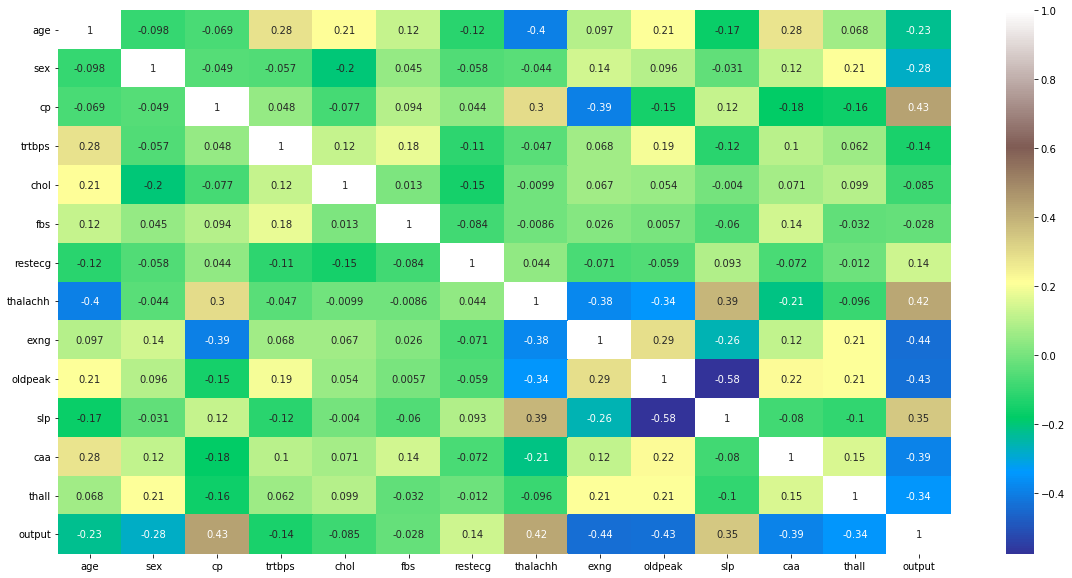

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

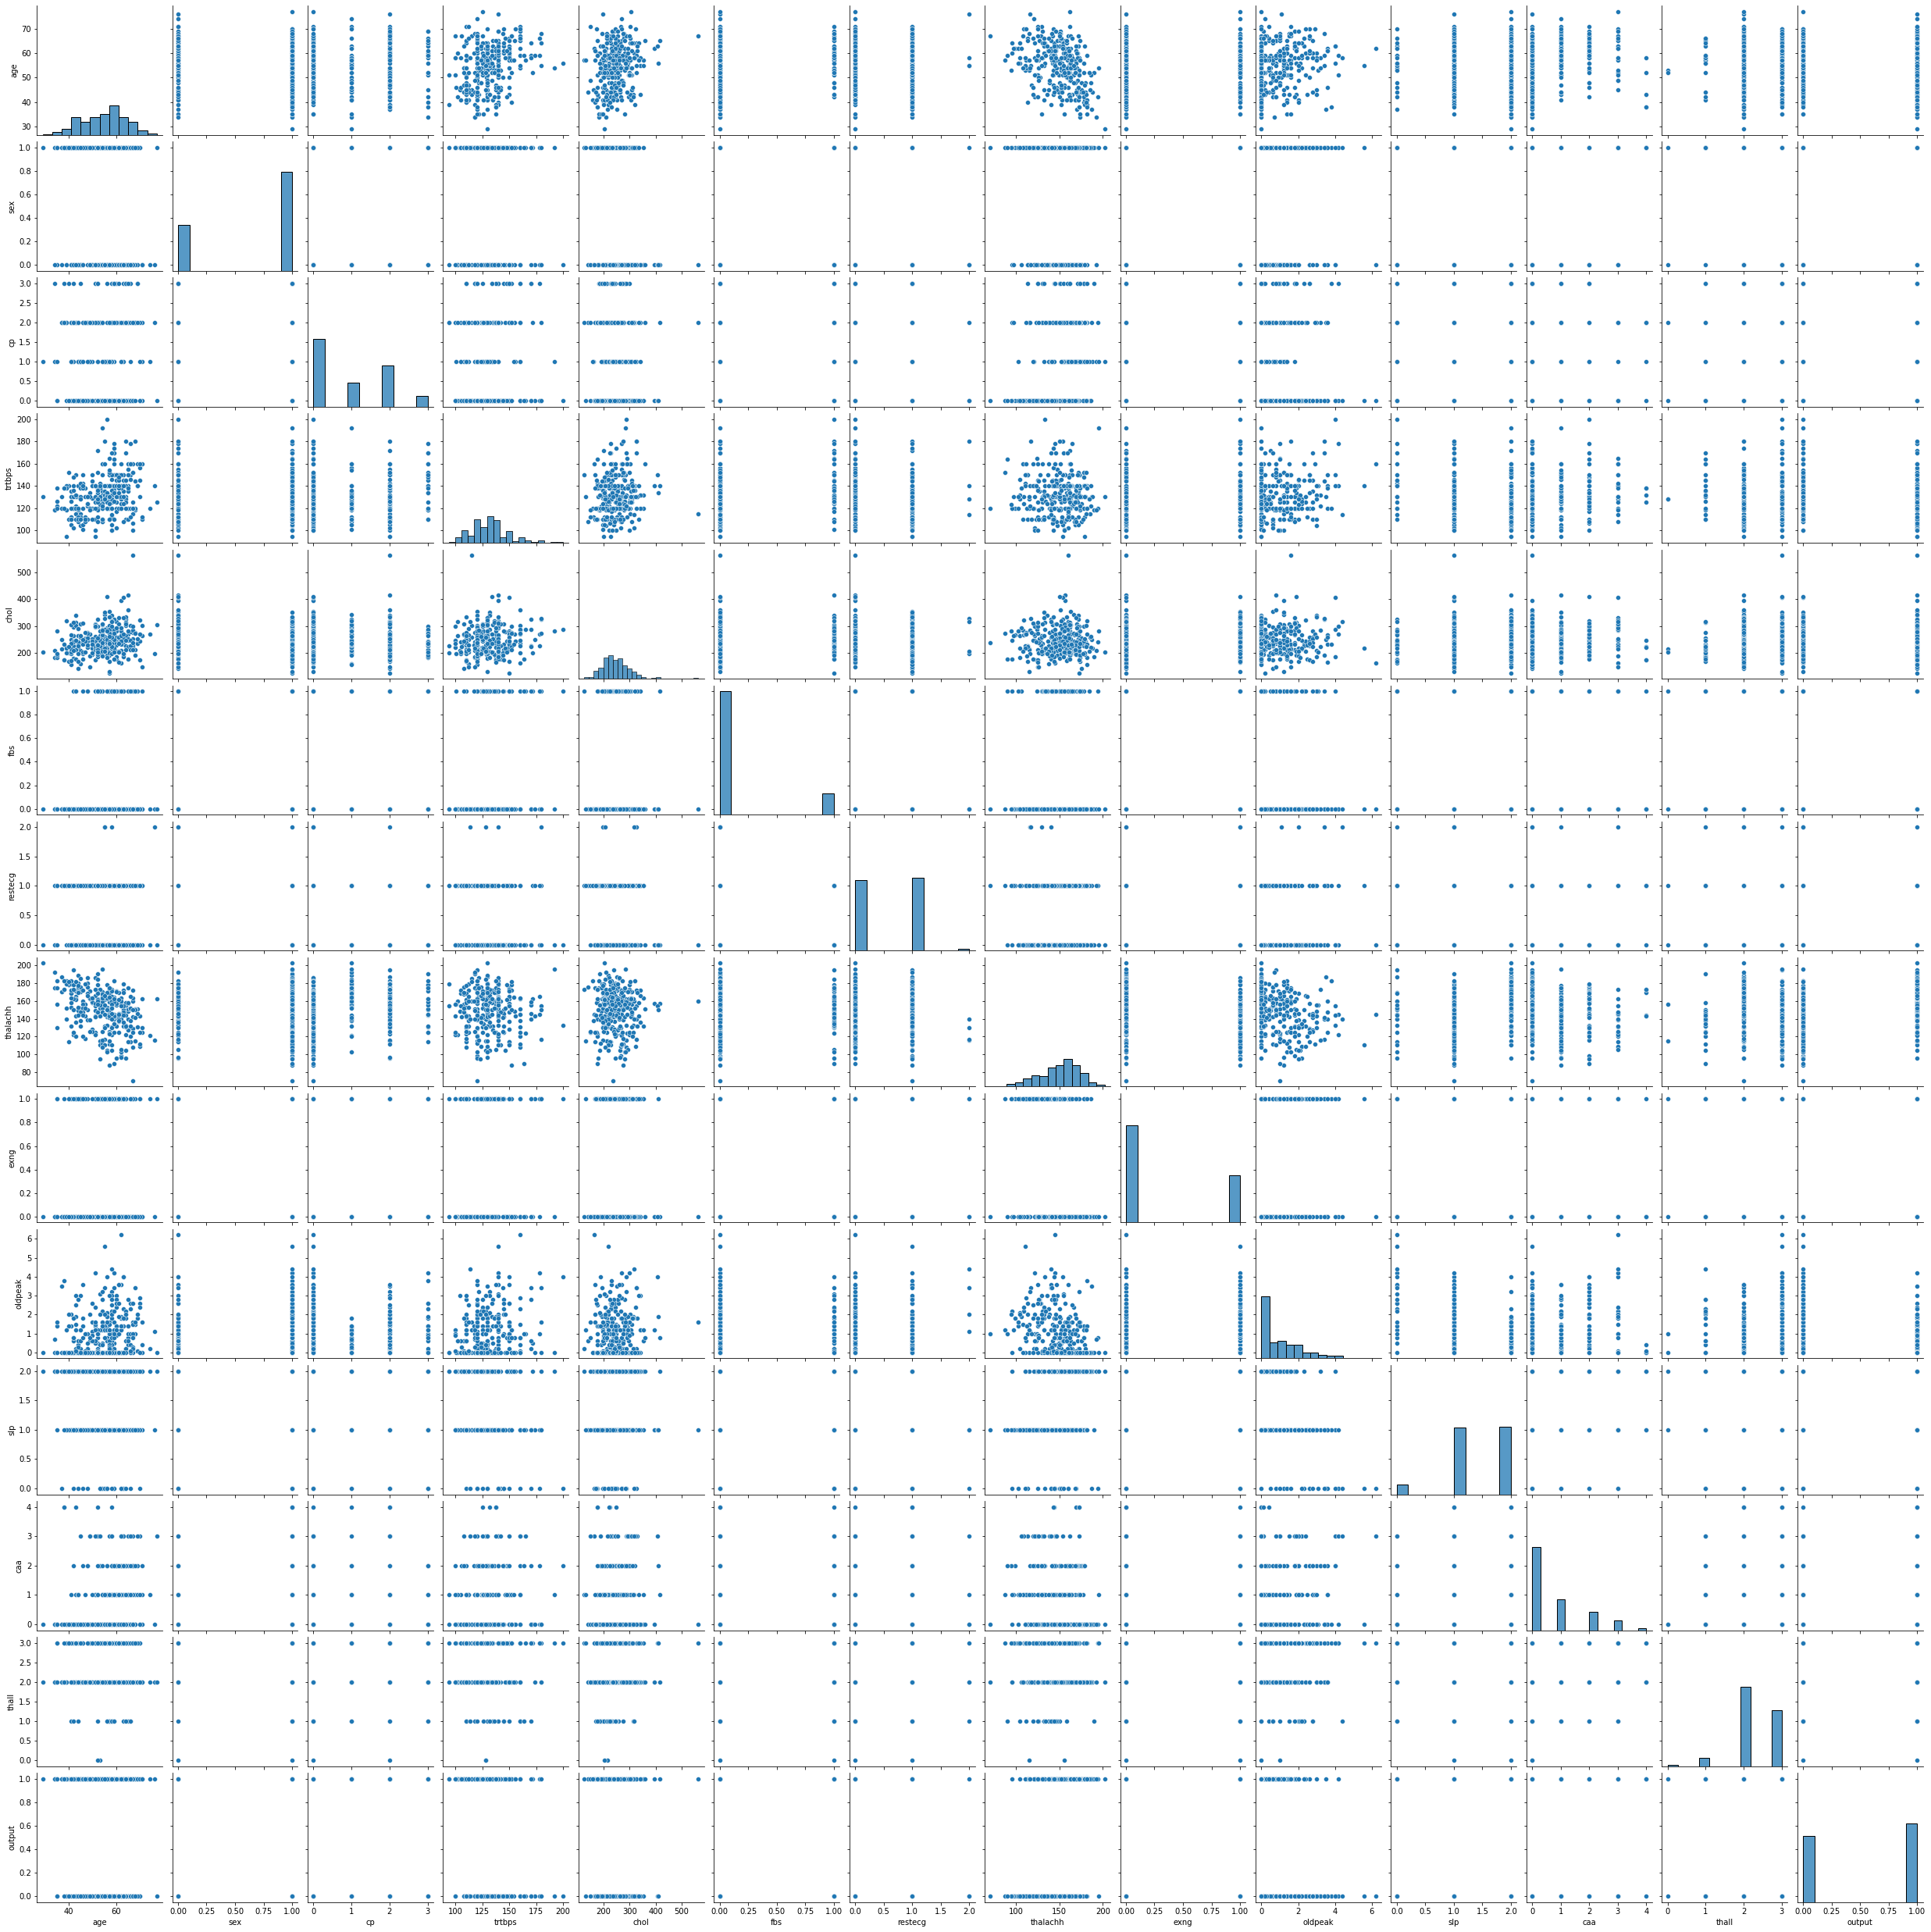

In [9]:
sns.pairplot(data=df)

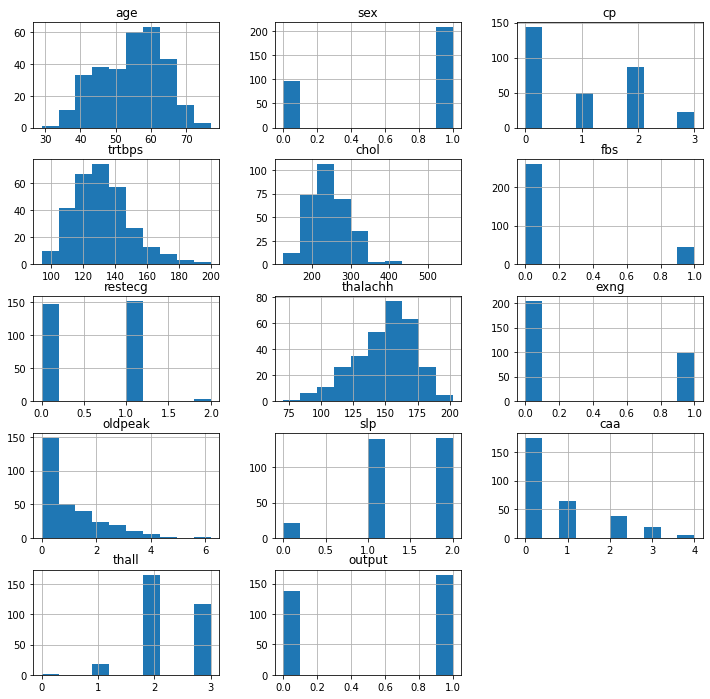

In [22]:
df.hist(figsize=(12,12), layout=(5,3));

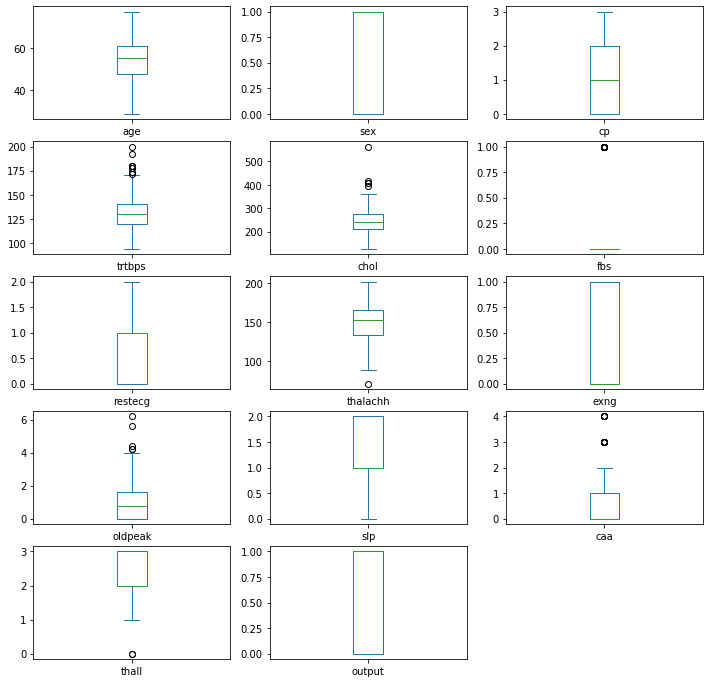

In [23]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

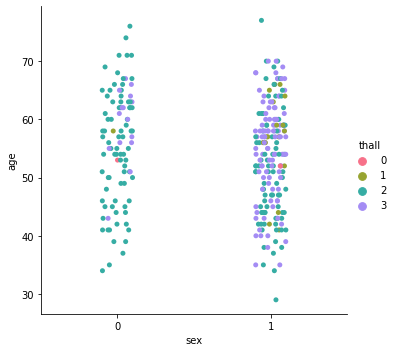

In [25]:
sns.catplot(data=df, x='sex', y='age',  hue='thall', palette='husl')

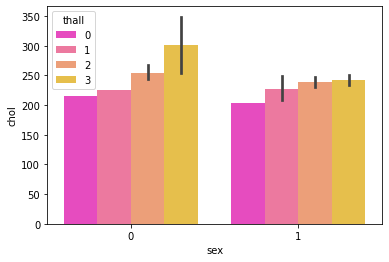

In [26]:
sns.barplot(data=df, x='sex', y='chol', hue='thall', palette='spring')

In [27]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [28]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

165 cases of heart diseases
and 138 cases of no heart diseases

In [32]:
df['chol'].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

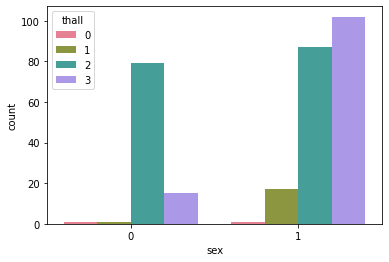

In [34]:
sns.countplot(x='sex', data=df, palette='husl', hue='thall')

Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

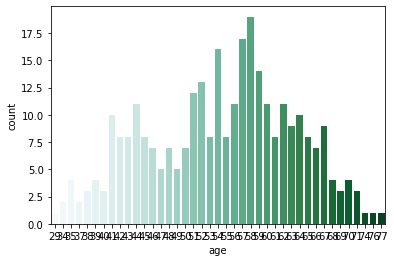

In [35]:
sns.countplot(x='age',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 140 and those having heart disease the count is 160.

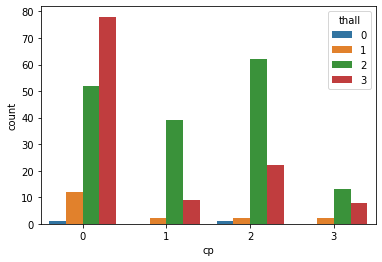

In [37]:
sns.countplot(x='cp',hue='thall',data=df)

cp : number of major vessels (0-3) colored by flourosopy

In [40]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

cp number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.

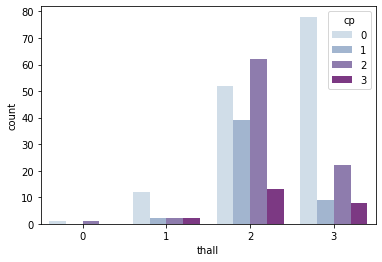

In [43]:
sns.countplot(x='thall',data=df, hue='cp', palette='BuPu' )

thall = normal; 6 = fixed defect; 7 = reversable defect

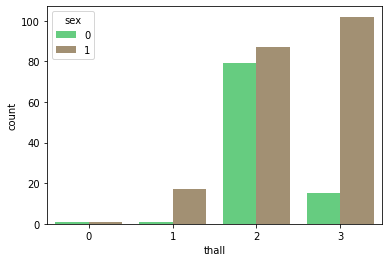

In [44]:
sns.countplot(x='thall', hue='sex',data=df, palette='terrain')

In [45]:
df['cp'].value_counts()  # chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

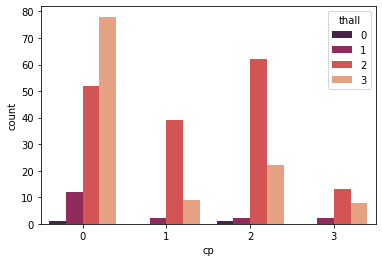

In [47]:
sns.countplot(x='cp' ,hue='thall', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

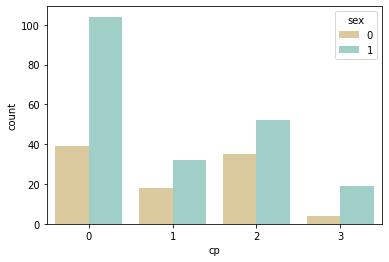

In [48]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

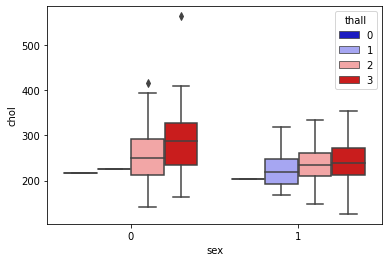

In [49]:
sns.boxplot(x='sex', y='chol', hue='thall', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set.

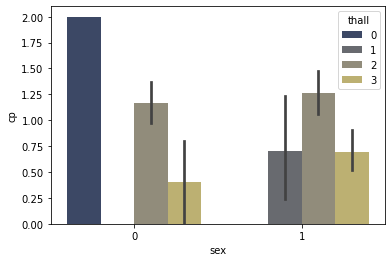

In [50]:
sns.barplot(x='sex', y='cp', hue='thall',data=df, palette='cividis')

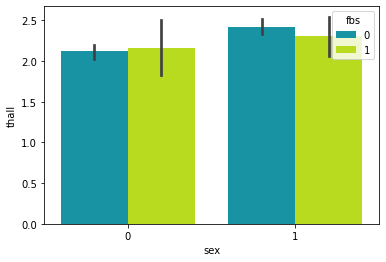

In [52]:
sns.barplot(x='sex', y='thall', data=df, hue='fbs', palette='nipy_spectral')

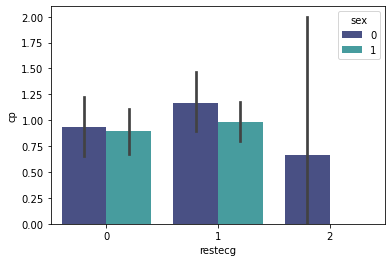

In [53]:
sns.barplot(x='restecg', y='cp', hue='sex', data=df, palette='mako')

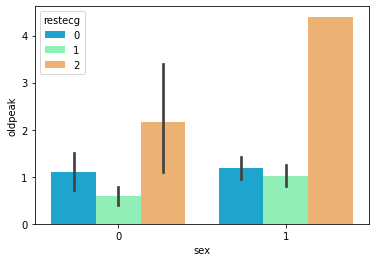

In [54]:
sns.barplot(x='sex', y='oldpeak', hue='restecg', palette='rainbow', data=df)

ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [55]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

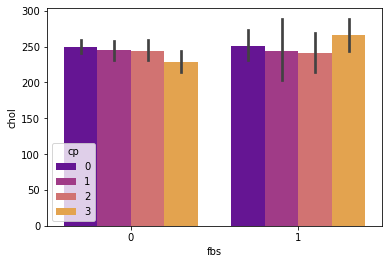

In [56]:
sns.barplot(x='fbs', y='chol', hue='cp', data=df,palette='plasma' )

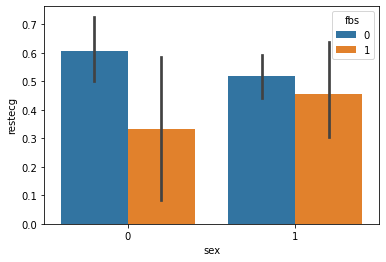

In [57]:
sns.barplot(x='sex',y='restecg', hue='fbs',data=df)

Cross Tables

In [59]:
gen = pd.crosstab(df['sex'], df['thall'])
print(gen)

thall  0   1   2    3
sex                  
0      1   1  79   15
1      1  17  87  102


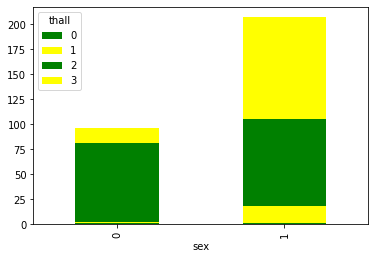

In [60]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [61]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thall']], 
            margins=True)
temp

thall,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


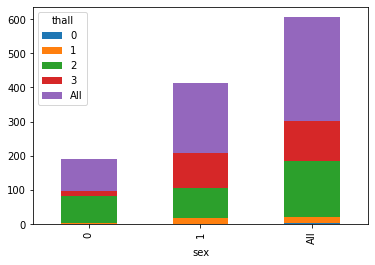

In [62]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [64]:
temp=pd.crosstab(index=df['restecg'],
            columns=[df['thall']], 
            margins=True)
temp

thall,0,1,2,3,All
restecg,,,,,
0,1,10,78,58,147
1,1,7,86,58,152
2,0,1,2,1,4
All,2,18,166,117,303


In [65]:
chest_pain = pd.crosstab(df['cp'], df['cp'])
chest_pain

cp,0,1,2,3
cp,,,,
0,143,0,0,0
1,0,50,0,0
2,0,0,87,0
3,0,0,0,23


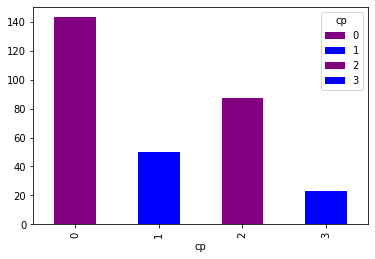

In [66]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

Preparing the data for Model

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','restecg','chol','cp','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [93]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

In [69]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,1.973123,145,-0.256334,1,-1.005832,150,0,1.087338,0,0,1,1
1,-1.915313,1,1.002577,130,0.072199,0,0.898962,187,0,2.122573,0,0,2,1
2,-1.474158,0,0.032031,130,-0.816773,0,-1.005832,172,0,0.310912,2,0,2,1
3,0.180175,1,0.032031,120,-0.198357,0,0.898962,178,0,-0.206705,2,0,2,1
4,0.290464,0,-0.938515,120,2.082050,0,0.898962,163,1,-0.379244,2,0,2,1


In [126]:
X= df.drop(['thall'], axis=1)
y= df['thall']

In [127]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

Check the sample Size

In [128]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


In [129]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## 1---> Defective Heart
# 0---> Healthy Heart

## Splitting the Features and Target

Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[ 0,  5,  3],
       [ 0, 40, 11],
       [ 0,  7, 25]])

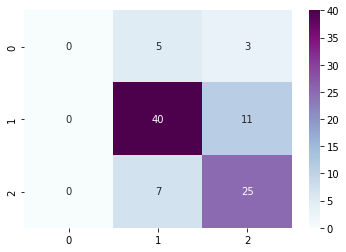

In [121]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [120]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.8888888888888888


In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.7142857142857143

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.77      0.78      0.78        51
           3       0.64      0.78      0.70        32

    accuracy                           0.71        91
   macro avg       0.47      0.52      0.49        91
weighted avg       0.66      0.71      0.68        91



Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [133]:
cm2

array([[ 0,  0,  0,  0],
       [ 0,  0,  3,  5],
       [ 1,  0, 32, 18],
       [ 0,  4, 13, 15]])

In [134]:
accuracy_score(y_test,prediction2)

0.5164835164835165

In [84]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.20      0.12      0.15         8
           2       0.66      0.69      0.67        51
           3       0.44      0.44      0.44        32

    accuracy                           0.55        91
   macro avg       0.32      0.31      0.32        91
weighted avg       0.54      0.55      0.54        91



Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[ 0,  3,  5],
       [ 0, 40, 11],
       [ 1,  7, 24]])

In [86]:
accuracy_score(y_test, prediction3)

0.7142857142857143

In [87]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.79      0.80      0.80        51
           3       0.62      0.75      0.68        32

    accuracy                           0.71        91
   macro avg       0.47      0.52      0.49        91
weighted avg       0.66      0.71      0.68        91



In [155]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model4 = NB.fit(X_train, y_train)
prediction4 = model4.predict(X_test)
cm4= confusion_matrix(y_test, prediction4)

In [139]:
cm4

array([[ 5,  1,  2],
       [ 9, 37,  5],
       [20,  6,  6]])

In [140]:
accuracy_score(y_test, prediction4)

0.5274725274725275

In [141]:

print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))


lr : 0.7142857142857143
dtc : 0.5164835164835165
rfc : 0.7032967032967034
NB:  0.5274725274725275


Best accuracy is given by Logistic Regression : 92
followed by NB and Decision tree : 90

## BUILDING A PREDICTIVE SYSTEM 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [164]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [151]:


A = heart_data.drop(columns='target', axis=1)
B = heart_data['target']

In [168]:
print(A)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [169]:
print(B)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [170]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, stratify=B, random_state=2)

In [171]:
print(A.shape, A_train.shape, A_test.shape)

(303, 13) (242, 13) (61, 13)


In [172]:
model = LogisticRegression()

In [176]:
# training the LogisticRegression model with Training data
model.fit(A_train, B_train)

LogisticRegression()

In [177]:
A_train_prediction = model1.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction, B_train)

In [178]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.0


In [179]:

# accuracy on test data
A_test_prediction = model.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)

In [180]:

print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.819672131147541


In [191]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [194]:
input_data = (44,1,1,120,263,0,1,173,0,0,2,0,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
